<div class="alert alert-success">
<b> Комментарий от ревьюера 2 ✔️</b>

Привет еще раз. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 

<b> Комментарий от ревьюера ❗</b>

Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">

<b> Комментарий от ревьюера ⚠️</b>

Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">

<b> Комментарий от ревьюера ✔️</b>

Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___

Мне необходимо исследовать данные о пользователях мобильной сети "Мегалайн" с целью выбрать наиболее успешный тариф из двух имеющихся.

## 1. Изучение данных 

### 1.1. Откроем файлы с данными и изучим информацию

<div class="alert alert-info">
Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    df_calls = pd.read_csv('calls.csv')
except:
    df_calls = pd.read_csv('/datasets/calls.csv')
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Кажется, работа над проектом велась локально и пути к файлам не были изменены на общедоступные. Стоит переписать код таким образом, что бы он запускался и в jupiter hub, и локально без внесения дополнительных правок. Этого можно добиться многими способами. Например, использовать конструкцию `try-except` для путей файлов: `try` - пути на локальном компьютере, `except` - пути на сервере. Или применить библиотеку `os`:

```
import os

pth1 = '/folder_1/data.csv'
pth2 = '/folder_2/data.csv'

if os.path.exists(pth1):
    query_1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    query_1 = pd.read_csv(pth2)
else:
    print('Something is wrong)
```
</div>

<div class="alert alert-info">
К сожалению не подумал сразу о пути к файлам, так как это мой первый проект, сделаный локально.
Конструкция Try-except кажется проще.
Спасибо

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

👍
</div>


Отлично. Со звонками примерно все ясно. Имеем 4 колонки: id записи, дату, длительность и id пользователя.

In [3]:
try:
    df_internet = pd.read_csv('internet.csv')
except:
    df_internet = pd.read_csv('/datasets/internet.csv')
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Похожие данные, за исключением новой информации о количестве использованного трафика. К тому же судя по всему тут странная колонка 'Unnamed:' полностью повторяющая индексы строк. 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Здорово, что обратил внимание на признак `Unnamed: 0`. Кстати, можно задать этот признак в качестве индекса таблицы при загрузке данных.
    
`pd.read_csv('/datasets/internet.csv', index_col=[0])`
</div>


In [4]:
try:
    df_messages = pd.read_csv('messages.csv')
except:
    df_messages = pd.read_csv('/datasets/messages.csv')
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [5]:
try:
    df_tarrifs = pd.read_csv('tariffs.csv')
except:
    df_tarrifs = pd.read_csv('/datasets/tariffs.csv')
df_tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Датафрейм имеет информацию о включенных в тариф пакетах.

In [6]:
try:
    df_users = pd.read_csv('users.csv')
except:
    df_users = pd.read_csv('/datasets/users.csv')
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Тут мы имеем информацию о пользователях яслуг мобильной сети, а так же об их тарифах.

Подсчитаем какой тариф популярнее

In [7]:
df_users.query('tariff == "smart"').count()

user_id       351
age           351
churn_date     23
city          351
first_name    351
last_name     351
reg_date      351
tariff        351
dtype: int64

<div class="alert alert-info">
Исходя из факта, что мы исследуем 500 пользователей, получаем результат, что тариф "Смарт" значительно более популярен чем "Ультра" (351 пользовватель против 149)

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
> Подсчитаем какой тариф популярнее
    
Так какой тариф популярнее? Пока тут видно только количество клиентов с тарифом Смарт.
</div>


<div class="alert alert-info">
Подумал о популярности, принял факт за очевидность и забыл написать.
    Спасибо

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Спасибо, что добавил комментарий
</div>

## 2. Подготовка данных

### 2.1. Звонки

Проверим df_calls на наличие пропущенных значений

In [8]:
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Так как по условиям тарифов минуты округляются в большую сторону, заменим значения в столбце 'duration' на целые.

Сначала округлим в сторону увеличения, затем переведем в числовое значение int.

In [10]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Хорошее решение, но все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
    Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
</div>

<div class="alert alert-info">
Исправил

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

👍

</div>

Добавим колонку month так как тарифы имеют помесячную оплату.

In [11]:
#df_calls['month']=df_calls['call_date'].dt.month

Не получилось, попробуем по-другому

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Не получилось, потому что тип данных `call_date` object, а должен быть datetime, чтобы мы могли обращаться к .dt.month
    
`pd.to_datetime(df_calls['call_date']).dt.month`
</div>

In [12]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month 
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [13]:
df_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Минимальное значение 0 (тоесть разговор не состоялся), а максимальное 38 минут, что вполне может соответствовать реальности.

Считаю, что указаный датафрейм не содержит ошибок.

Посчитаем общее количество звонков и минут по каждому клиенту.

In [14]:
df_calls_grouped = df_calls.groupby(['user_id', 'month']).sum()
df_calls_grouped

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

### 2.2. Internet

In [15]:
#df_calls_result = df_calls_result.reset_index()
#df_calls_result

Посчитаем трафик каждого пользователя по месяцам 

Сначала добавим в датафрейм колонку с месяцами использования

In [16]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month 

Сгруппируем данные по пользователям и месяцам.

In [17]:
#df_internet_result = df_internet.pivot_table(index=('user_id', 'month'), values='mb_used', aggfunc=('sum'))
#df_internet_result

In [18]:
df_internet_grouped = df_internet.groupby(['user_id', 'month']).sum()
df_internet_grouped

Unnamed: 0   mb_used
user_id month                      
1000    5             443   2253.49
        6            5536  23233.77
        7            3504  14003.64
        8            2977  14055.93
        9            2746  14568.91
...                   ...       ...
1498    10        8798268  20579.36
1499    9          746608   1845.75
        10        8660473  17788.51
        11        7316606  17963.31
        12        6719082  13055.58

[3203 rows x 2 columns]

По условиям тарифов подсчет траффика ведется в гигобайтах и округляется в большую сторону

Добавим в сводную таблицу соответствующую колонку. ~И уберем подкатегории.~

In [19]:
df_internet_grouped['gb_used'] =  np.ceil(df_internet_grouped['mb_used'] / 1000).astype(int)
#df_internet_result = df_internet_result.reset_index()
df_internet_grouped

Unnamed: 0   mb_used  gb_used
user_id month                               
1000    5             443   2253.49        3
        6            5536  23233.77       24
        7            3504  14003.64       15
        8            2977  14055.93       15
        9            2746  14568.91       15
...                   ...       ...      ...
1498    10        8798268  20579.36       21
1499    9          746608   1845.75        2
        10        8660473  17788.51       18
        11        7316606  17963.31       18
        12        6719082  13055.58       14

[3203 rows x 3 columns]

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
1 Гб = 1024 Мб
</div>

In [20]:
#df_internet_grouped = df_internet_grouped.drop(columns='mb_used')
#df_internet_grouped

### 2.3. Сообщения

Посмотрим общую информацию

In [21]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Видимо пропусков нет

Посчитаем общее количество сообщений по каждому пользователю за один месяц ~и уберем подкатегории~

In [22]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month 
#df_messages_result =df_messages_result.reset_index()
#df_messages_result
df_messages_grouped = df_messages.groupby(['user_id', 'month']).count()
df_messages_grouped

id  message_date
user_id month                  
1000    5      22            22
        6      60            60
        7      75            75
        8      81            81
        9      57            57
...            ..           ...
1498    10     42            42
1499    9      11            11
        10     48            48
        11     59            59
        12     66            66

[2717 rows x 2 columns]

Поищим возможные вбросы

In [23]:
df_messages_grouped.describe()

,id,message_date
count,2717.000000,2717.000000
mean,45.283769,45.283769
std,35.051363,35.051363
min,1.000000,1.000000
25%,19.000000,19.000000
50%,38.000000,38.000000
75%,63.000000,63.000000
max,224.000000,224.000000


Не смотря на то, что есть клиенты отправляющие более 200 сообщений в месяц, данный факт не кажется невозможным. Проверим

In [24]:
len(df_messages_grouped.query('id > 150'))

41

Достаточно много пользователей активно пользуются сервисом отправки сообщений.

### 2.4. Объединение таблиц

Чтобы облегчить анализ данных следует объединить таблицы.

Саздадим новый датафрейм содержащий сгруппированные по пользователям и по месяцам данные по всем услугам оператора.

In [25]:
df_new = df_calls_grouped.join(df_internet_grouped, how='outer')
df_new

duration  Unnamed: 0   mb_used  gb_used
user_id month                                         
1000    5         159.0       443.0   2253.49      3.0
        6         172.0      5536.0  23233.77     24.0
        7         340.0      3504.0  14003.64     15.0
        8         408.0      2977.0  14055.93     15.0
        9         466.0      2746.0  14568.91     15.0
...                 ...         ...       ...      ...
1498    10        247.0   8798268.0  20579.36     21.0
1499    9          70.0    746608.0   1845.75      2.0
        10        449.0   8660473.0  17788.51     18.0
        11        612.0   7316606.0  17963.31     18.0
        12        492.0   6719082.0  13055.58     14.0

[3214 rows x 4 columns]

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Обрати внимание, что в методе join по умолчанию используется левое соединение таблиц, то есть к строкам из левой таблицы добавляется информация из правой таблицы. Если пользователь не совершал звонки, но пользовался сообщениями/трафиком, он не попадет в таблицу
    
Поправь, пожалуйста, код так, чтобы брать все строки из всех таблиц. Про соединения можешь посмотреть [тут](https://medium.com/@Lexx01/sql-inner-и-outer-join-64f3862d8540)
</div>


<div class="alert alert-info">
Упустил этот момент. Действительно, при объединении с укахзанием типа 'outer' добавилось целых 40 строк! 3214 против 3174

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Теперь все отлично!

</div>

In [26]:
df_new = df_new.join(df_messages_grouped, how='outer')
df_new

duration  Unnamed: 0   mb_used  gb_used    id  message_date
user_id month                                                             
1000    5         159.0       443.0   2253.49      3.0  22.0          22.0
        6         172.0      5536.0  23233.77     24.0  60.0          60.0
        7         340.0      3504.0  14003.64     15.0  75.0          75.0
        8         408.0      2977.0  14055.93     15.0  81.0          81.0
        9         466.0      2746.0  14568.91     15.0  57.0          57.0
...                 ...         ...       ...      ...   ...           ...
1498    10        247.0   8798268.0  20579.36     21.0  42.0          42.0
1499    9          70.0    746608.0   1845.75      2.0  11.0          11.0
        10        449.0   8660473.0  17788.51     18.0  48.0          48.0
        11        612.0   7316606.0  17963.31     18.0  59.0          59.0
        12        492.0   6719082.0  13055.58     14.0  66.0          66.0

[3214 rows x 6 columns]

Уберем подкатегории

In [27]:
df_new = df_new.reset_index()
df_new

,user_id,month,duration,Unnamed: 0,mb_used,gb_used,id,message_date
0,1000,5,159.0,443.0,2253.49,3.0,22.0,22.0
1,1000,6,172.0,5536.0,23233.77,24.0,60.0,60.0
2,1000,7,340.0,3504.0,14003.64,15.0,75.0,75.0
3,1000,8,408.0,2977.0,14055.93,15.0,81.0,81.0
4,1000,9,466.0,2746.0,14568.91,15.0,57.0,57.0
...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,8798268.0,20579.36,21.0,42.0,42.0
3210,1499,9,70.0,746608.0,1845.75,2.0,11.0,11.0
3211,1499,10,449.0,8660473.0,17788.51,18.0,48.0,48.0
3212,1499,11,612.0,7316606.0,17963.31,18.0,59.0,59.0


Теперь присоединим данные по пользователям из таблицы df_users по колонке user_id.

In [28]:
df_new = df_new.merge(df_users[['user_id', 'tariff','city']], on='user_id')

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Лучше взять только столбцы, которые мы будем использовать в исследовании, чтобы таблица занимала меньше места в памяти
    
`df_new.merge(df_users[['user_id', 'tariff','city']], on='user_id')`
</div>

<div class="alert alert-info">
Спасибо. Так таблица действительно выглядит лучше.

И посмотрим

In [29]:
df_new

,user_id,month,duration,Unnamed: 0,mb_used,gb_used,id,message_date,tariff,city
0,1000,5,159.0,443.0,2253.49,3.0,22.0,22.0,ultra,Краснодар
1,1000,6,172.0,5536.0,23233.77,24.0,60.0,60.0,ultra,Краснодар
2,1000,7,340.0,3504.0,14003.64,15.0,75.0,75.0,ultra,Краснодар
3,1000,8,408.0,2977.0,14055.93,15.0,81.0,81.0,ultra,Краснодар
4,1000,9,466.0,2746.0,14568.91,15.0,57.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,8798268.0,20579.36,21.0,42.0,42.0,smart,Владикавказ
3210,1499,9,70.0,746608.0,1845.75,2.0,11.0,11.0,smart,Пермь
3211,1499,10,449.0,8660473.0,17788.51,18.0,48.0,48.0,smart,Пермь
3212,1499,11,612.0,7316606.0,17963.31,18.0,59.0,59.0,smart,Пермь


Думаю колонки 'Unnamed: 0', 'id', 'mb_used' не имеют ценности для анализа и их можно удалить из датафрейма.

In [30]:
df_new = df_new.drop(['Unnamed: 0', 'id', 'mb_used'], axis=1)

И посмотрим

In [31]:
df_new

,user_id,month,duration,gb_used,message_date,tariff,city
0,1000,5,159.0,3.0,22.0,ultra,Краснодар
1,1000,6,172.0,24.0,60.0,ultra,Краснодар
2,1000,7,340.0,15.0,75.0,ultra,Краснодар
3,1000,8,408.0,15.0,81.0,ultra,Краснодар
4,1000,9,466.0,15.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ
3210,1499,9,70.0,2.0,11.0,smart,Пермь
3211,1499,10,449.0,18.0,48.0,smart,Пермь
3212,1499,11,612.0,18.0,59.0,smart,Пермь


Так лучше

### 2.5. Обработка пропусков

In [32]:
df_new.isna().sum()

user_id           0
month             0
duration         40
gb_used          11
message_date    497
tariff            0
city              0
dtype: int64

В колонках gb_used и message_date есть пропущенные значения. Почти уверен, что пропуски вызваны обычным отсутствием обращений пользователей к данным услугам. Следовательно, будет логичным заменить пропуски нулями.

In [33]:
df_new['gb_used'] = df_new['gb_used'].fillna(0)


In [34]:
df_new['message_date'] = df_new['message_date'].fillna(0)


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
После того, как поправишь объединение таблиц, появятся пропуски в duration. Обрати на это внимание, пожалуйста.

</div>

<div class="alert alert-info">
А вот и они. Те самые 40 пропусков(строк) в столбце 'duration'

<div class="alert alert-info">
Заменим пропуски нулями

In [35]:
df_new['duration'] = df_new['duration'].fillna(0)


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Все верно

</div>

### 2.6. Обработка данных по тарифам

#### 2.6.1. Тариф smart

Разделю таблицу на две по тарифам, так как на начальном этапе планирую внвлизировать данные отдельно

In [36]:
df_smart = df_new.query('tariff == "smart"')
df_smart

,user_id,month,duration,gb_used,message_date,tariff,city
8,1001,11,430.0,19.0,0.0,smart,Москва
9,1001,12,414.0,15.0,0.0,smart,Москва
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак
...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ
3210,1499,9,70.0,2.0,11.0,smart,Пермь
3211,1499,10,449.0,18.0,48.0,smart,Пермь
3212,1499,11,612.0,18.0,59.0,smart,Пермь


In [37]:
import warnings
warnings.filterwarnings("ignore")

Так как задача исследования оценить прибыль компании с каждого пользователя по месяцам, добавим несколько колонок включающие стоимость тарифа, а так же стоимость пользования услугами сверх тарифа.

<div class="alert alert-info">
Еще раз откроем таблицу с условиями тарифов

In [38]:
df_tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [39]:
df_smart['tariff_cost'] = df_tarrifs.loc[0, 'rub_monthly_fee']
df_smart['min_add'] = (
    df_smart['duration'] - df_tarrifs.loc[0, 'minutes_included']) * df_tarrifs.loc[0, 'rub_per_minute']
df_smart.loc[df_smart['min_add'] < 0, 'min_add'] = 0
df_smart

,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add
8,1001,11,430.0,19.0,0.0,smart,Москва,550,0.0
9,1001,12,414.0,15.0,0.0,smart,Москва,550,0.0
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак,550,0.0
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак,550,0.0
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак,550,0.0
...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ,550,0.0
3210,1499,9,70.0,2.0,11.0,smart,Пермь,550,0.0
3211,1499,10,449.0,18.0,48.0,smart,Пермь,550,0.0
3212,1499,11,612.0,18.0,59.0,smart,Пермь,550,336.0


<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Лучше брать лимиты и стоимость услуг из таблицы df_tarrifs, иначе оператор может изменить условия тарифов, и у нас появится ошибка в коде
</div>

<div class="alert alert-info">
Это очень логично. Хотя немного усложняет. Спасибо

<div class="alert alert-info">
Скорректирую данные для всех добавляемых столбцов

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Здорово, что поправил код

</div>

In [40]:
df_smart['gb_add'] = (
    df_smart['gb_used'] - df_tarrifs.loc[0, 'mb_per_month_included'] / 1024) * df_tarrifs.loc[0, 'rub_per_gb']
df_smart.loc[df_smart['gb_add'] < 0, 'gb_add'] = 0
df_smart

,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add,gb_add
8,1001,11,430.0,19.0,0.0,smart,Москва,550,0.0,800.0
9,1001,12,414.0,15.0,0.0,smart,Москва,550,0.0,0.0
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак,550,0.0,0.0
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак,550,0.0,600.0
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак,550,0.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ,550,0.0,1200.0
3210,1499,9,70.0,2.0,11.0,smart,Пермь,550,0.0,0.0
3211,1499,10,449.0,18.0,48.0,smart,Пермь,550,0.0,600.0
3212,1499,11,612.0,18.0,59.0,smart,Пермь,550,336.0,600.0


In [41]:
df_smart['mes_add'] = (
    df_smart['message_date'] - df_tarrifs.loc[0, 'messages_included']) * df_tarrifs.loc[0, 'rub_per_message']
df_smart.loc[df_smart['mes_add'] < 0, 'mes_add'] = 0
df_smart

,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add,gb_add,mes_add
8,1001,11,430.0,19.0,0.0,smart,Москва,550,0.0,800.0,0.0
9,1001,12,414.0,15.0,0.0,smart,Москва,550,0.0,0.0,0.0
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак,550,0.0,0.0,0.0
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак,550,0.0,600.0,0.0
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак,550,0.0,1200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ,550,0.0,1200.0,0.0
3210,1499,9,70.0,2.0,11.0,smart,Пермь,550,0.0,0.0,0.0
3211,1499,10,449.0,18.0,48.0,smart,Пермь,550,0.0,600.0,0.0
3212,1499,11,612.0,18.0,59.0,smart,Пермь,550,336.0,600.0,27.0


И подсчитаем суммарную прибыль с каждого пользователя за месяц

In [42]:
df_smart['total_income'] = df_smart['tariff_cost'] + df_smart['min_add']+ df_smart['gb_add'] + df_smart['mes_add']
df_smart

,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add,gb_add,mes_add,total_income
8,1001,11,430.0,19.0,0.0,smart,Москва,550,0.0,800.0,0.0,1350.0
9,1001,12,414.0,15.0,0.0,smart,Москва,550,0.0,0.0,0.0,550.0
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак,550,0.0,0.0,0.0,550.0
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак,550,0.0,600.0,0.0,1150.0
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак,550,0.0,1200.0,0.0,1750.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.0,21.0,42.0,smart,Владикавказ,550,0.0,1200.0,0.0,1750.0
3210,1499,9,70.0,2.0,11.0,smart,Пермь,550,0.0,0.0,0.0,550.0
3211,1499,10,449.0,18.0,48.0,smart,Пермь,550,0.0,600.0,0.0,1150.0
3212,1499,11,612.0,18.0,59.0,smart,Пермь,550,336.0,600.0,27.0,1513.0


In [43]:
df_smart['total_income'].sum()

3000151.0

Общая прибыль с данной выборки пользователей тарифа смарт за 2018 год составила почти 3 миллиона

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
В целом ты правильно посчитал месячные платежи пользователей
</div>

#### 2.6.2. Тариф ultra

Те же операции проделаем для пользователей тарифа ultra

In [44]:
df_ultra = df_new.query('tariff == "ultra"')
df_ultra

,user_id,month,duration,gb_used,message_date,tariff,city
0,1000,5,159.0,3.0,22.0,ultra,Краснодар
1,1000,6,172.0,24.0,60.0,ultra,Краснодар
2,1000,7,340.0,15.0,75.0,ultra,Краснодар
3,1000,8,408.0,15.0,81.0,ultra,Краснодар
4,1000,9,466.0,15.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3186,1495,8,92.0,3.0,13.0,ultra,Иркутск
3187,1495,9,813.0,34.0,82.0,ultra,Иркутск
3188,1495,10,1030.0,30.0,82.0,ultra,Иркутск
3189,1495,11,954.0,39.0,79.0,ultra,Иркутск


<div class="alert alert-info">
Еще раз открою таблицу с тарифами, чтобы было проще менять данные

In [45]:
df_tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [46]:
df_ultra['tariff_cost'] = df_tarrifs.loc[1, 'rub_monthly_fee']

df_ultra['min_add'] = (
    df_ultra['duration'] - df_tarrifs.loc[1, 'minutes_included']) * df_tarrifs.loc[1, 'rub_per_minute']
df_ultra.loc[df_ultra['min_add'] < 0, 'min_add'] = 0

df_ultra['gb_add'] = (
    df_ultra['gb_used'] - df_tarrifs.loc[1, 'mb_per_month_included'] / 1024) * df_tarrifs.loc[1, 'rub_per_gb']
df_ultra.loc[df_ultra['gb_add'] < 0, 'gb_add'] = 0

df_ultra['mes_add'] = (
    df_ultra['message_date'] - df_tarrifs.loc[1, 'messages_included']) * df_tarrifs.loc[1, 'rub_per_message']
df_ultra.loc[df_ultra['mes_add'] < 0, 'mes_add'] = 0

df_ultra['total_income'] = df_ultra['tariff_cost'] + df_ultra['min_add']+ df_ultra['gb_add'] + df_ultra['mes_add']
df_ultra

,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add,gb_add,mes_add,total_income
0,1000,5,159.0,3.0,22.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
1,1000,6,172.0,24.0,60.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
2,1000,7,340.0,15.0,75.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
3,1000,8,408.0,15.0,81.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
4,1000,9,466.0,15.0,57.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3186,1495,8,92.0,3.0,13.0,ultra,Иркутск,1950,0.0,0.0,0.0,1950.0
3187,1495,9,813.0,34.0,82.0,ultra,Иркутск,1950,0.0,600.0,0.0,2550.0
3188,1495,10,1030.0,30.0,82.0,ultra,Иркутск,1950,0.0,0.0,0.0,1950.0
3189,1495,11,954.0,39.0,79.0,ultra,Иркутск,1950,0.0,1350.0,0.0,3300.0


<div class="alert alert-info">
Завязал все расчеты на датафрейм с данными тарифов. Теперь изменения исходных данных не исказить расчеты

In [47]:
df_ultra['total_income'].sum()

2058000.0

## 3. Анализ данных.

### 3.1. Smart

#### 3.1.1. Звонки

Начнем с продолжительности звонков

In [48]:
df_smart['duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

Больше половины клиентов укладываются в тарифные лимиты.

Построим гистограмму.

Text(0, 0.5, 'Число пользователей')

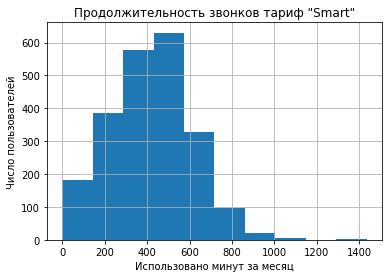

In [49]:
df_smart['duration'].hist()
plt.title('Продолжительность звонков тариф "Smart"')
plt.xlabel('Использовано минут за месяц')
plt.ylabel('Число пользователей')

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Добавь, пожалуйста, на все графики названия, подписи осей и легенду ((если рассматриваешь несколько наборов данных). Можешь посмотреть [тут](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface), как их добавлять
</div>


<div class="alert alert-info">
Добавил

Незначительное количество клиентов тарифа используют более 850 минут в месяц. Поэтому уберем вбросы по правилу трех сигм (трех стандартных отклонений

Проверим

In [50]:
df_smart.query('duration > 423+189*3').count()

user_id         7
month           7
duration        7
gb_used         7
message_date    7
tariff          7
city            7
tariff_cost     7
min_add         7
gb_add          7
mes_add         7
total_income    7
dtype: int64

<div class="alert alert-info">
    
~Удалим вбросы~

In [51]:
#df_smart = df_smart.query('duration < 423+189*3')

In [52]:
#df_smart['duration'].hist()


Гистограмма имеет нормальное распределение. Большая часть клиентоф тарифа используют от 200 до 650 минут в месяц. То есть некоторые клиенты вынуждены нести дополнительные доходы. Однако, учитывая тот факт что стоимость другого тарифа почти в четыре раза выше, выбор пользователей очевиден, а действие оператора по установлению лимита в 500 мин в месяц вполне логично.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Хороший комментарий
</div>

Ну и посчитаем дисперсию для выборки

In [53]:
#import numpy as np
print(np.var(df_smart['duration'], ddof=1))

36219.31578434428


#### 3.1.2. Интернет

In [54]:
df_smart['gb_used'].describe()

count    2229.000000
mean       16.695828
std         5.877404
min         0.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        39.000000
Name: gb_used, dtype: float64

С интернетом ситуация немного другая. Более половине пользователей не хватает трффика включенного в тариф.

Удалим вбросы и посмотрим гистограмму.

In [55]:
df_smart.query('gb_used > 16.67+5.85*3').count()

user_id         7
month           7
duration        7
gb_used         7
message_date    7
tariff          7
city            7
tariff_cost     7
min_add         7
gb_add          7
mes_add         7
total_income    7
dtype: int64

Text(0, 0.5, 'Число пользователей')

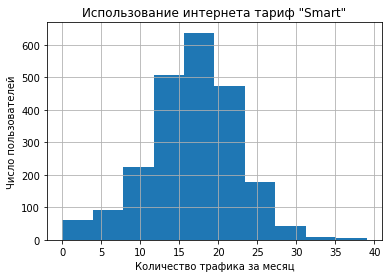

In [56]:
df_smart['gb_used'].hist()
plt.title('Использование интернета тариф "Smart"')
plt.xlabel('Количество трафика за месяц')
plt.ylabel('Число пользователей')

Большое количество клиентов используют значительно превышающий тарифный лимит объем трафика. Оператору следует изменить условия тарифа в части включенного трафика и увеличить его как минимум до 20 Гб в месяц путем увеличения абонентской платы либо создать новый (промежуточный) тариф. Для некоторых клиентов оплата сверхтрафика превышает даже стоимость тарифа ультра, что может оказать негативное влияние на отношение клиентов к компании.

Дисперсия

In [57]:
import numpy as np
print(np.var(df_smart['gb_used'], ddof=1))

34.54388294337817


#### 3.1.3. Сообщения

In [58]:
df_smart['message_date'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_date, dtype: float64

Среднее количество сообщений в месяц по тарифу смарт составляет чуть более 33, а третий квартиль практически соответствует тарифному лимиту в 50 сообщений. Не вижу смысла вносить какие либо изменения в тарифный план в части количества включенных сообщений.

#### 3.1.4. Промежуточный вывод

Учитывая тот факт что тариф smart является значительно более популярным чем ultra оператору следует внести корректировки в объем включенного трафика с повышением общей стоимости тарифа.

### 3.2. Ultra

#### 3.2.1. Звонки

In [59]:
df_ultra['duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

Text(0, 0.5, 'Число пользователей')

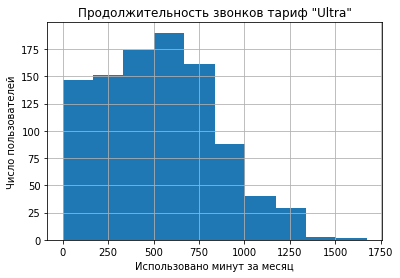

In [60]:
df_ultra['duration'].hist()
plt.title('Продолжительность звонков тариф "Ultra"')
plt.xlabel('Использовано минут за месяц')
plt.ylabel('Число пользователей')

Очевидно 3000 минут это очень много, более того, большая часть клентов использует не более 1000 минут в месяц. Если считать по правилу 3 сигм, то использование более 1500 минуть в месяц можно расценивать как вбросы. 

Дисперсия

In [61]:
print(np.var(df_ultra['duration'], ddof=1))

100873.63339730098


#### 3.2.2. Интернет

In [62]:
df_ultra['gb_used'].describe()

count    985.000000
mean      19.965482
std       10.100955
min        0.000000
25%       12.000000
50%       20.000000
75%       27.000000
max       50.000000
Name: gb_used, dtype: float64

Text(0, 0.5, 'Число пользователей')

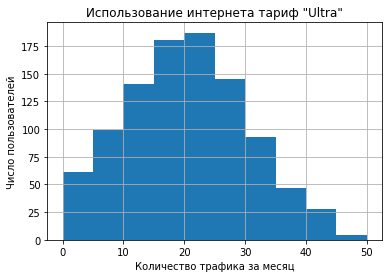

In [63]:
df_ultra['gb_used'].hist()
plt.title('Использование интернета тариф "Ultra"')
plt.xlabel('Количество трафика за месяц')
plt.ylabel('Число пользователей')

Для болшей части клиентов 30 Гб включенного трафика вполне достаточно. 

Посмотрим какое количество месяцев из выборки было зафиксировано превышение лимита.

In [64]:
df_ultra['user_id'].count()

985

In [65]:
df_ultra.query('gb_used > 30').count()

user_id         148
month           148
duration        148
gb_used         148
message_date    148
tariff          148
city            148
tariff_cost     148
min_add         148
gb_add          148
mes_add         148
total_income    148
dtype: int64

142 раза из 951. Это много.Логично предположить, что клиент выбирая тариф ультра подразумевает отсутствие дополнительных платежей. Было бы логичным увеличение включенного трафика до 40-45 Гб в месяц.

Этого нет в задании, но было бы интересно посчитать потенциальные убитки оператора из за увеличения включенного траффика до 45 Гб.

Сначала доход от сверхтрафика

In [66]:
df_ultra['gb_add'].sum()

137250.0

Теперь потенциальный доход при увеличении трафика.

In [67]:
df_ultra['potential_gb_add'] = (df_ultra['gb_used'] - 45) * 150
df_ultra.loc[df_ultra['potential_gb_add'] < 0, 'potential_gb_add'] = 0
df_ultra['potential_gb_add'].sum()

1500.0

Потери большие. Однако оператор мог бы немного увеличить абонентскую плату примерно на 150 в месяцчтобы нивелировать потенциальные потери.

Дисперсия

In [68]:
print(np.var(df_ultra['gb_used'], ddof=1))

102.02929511782429


#### 3.2.3. Сообщения

In [69]:
df_ultra['message_date'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_date, dtype: float64

Как и сминутами на тарифе ultra явный перекос по включенным смс. 1000 - это слишком много.

#### 3.2.4. Предварительный вывод

Оператору слудет провести корректировку тарифа Ultra, увеличив объем включенного траффика. В то же время количество включенных минут и сообщений явно завышено.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Все верно
</div>

## 4. Проверка гипотез

### 4.1. Выручка по тарифам

Сравним среднюю выручку пользователей тарифов "смарт" и "ультра" путем сравнения средних генеральных совокупностей.

Примем за нулевую гипотезу равенство генеральных совокупностей по выручке с тарифов. 

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Сформулируй, пожалуйста, альтернативную гипотезу
</div>


<div class="alert alert-info">
Очень хочется надеяться, что альтернативная гипотеза будет звучать так: "Генеральные совокупности по выручке с тарифов не равны." 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

"**Средние значения** генеральных совокупностей по выручке с тарифов не равны"

Мы ведь ниже будем средние значения сравнивать.
</div>

Так как выборки не равны и их дисперсии могут различаться, используем параметр "equal_var = False"

In [70]:
from scipy import stats as st
import numpy as np
alpha = .05
results = st.ttest_ind(df_ultra['total_income'], df_smart['total_income'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.070850352445897e-208
Отвергаем нулевую гипотезу


##### Итог

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Ты выбрал подходящий способ проверки гипотезы 
</div>

### 4.2.  Выручка по городам.

За нулевую гипотезу примем равенство выручки пользователей из Москвы с пользователями из других городов.

так как датафрейм разделен по тарифам, проведем сравнение для каждого.

#### 4.2.1. Smart

In [71]:
moscow = df_smart.query('city == "Москва"')
others = df_smart.query('city != "Москва"')

alpha = .05

results = st.ttest_ind(moscow['total_income'], others['total_income'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 0.14822064194758613
Не получилось отвергнуть нулевую гипотезу


#### 4.2.2. Ultra

In [72]:
moscow = df_ultra.query('city == "Москва"')
others = df_ultra.query('city != "Москва"')

alpha = .05

results = st.ttest_ind(moscow['total_income'], others['total_income'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 0.6678618929603073
Не получилось отвергнуть нулевую гипотезу


##### Итог

Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов вне зависимости от тарифа.


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Давай объединим датафреймы и проверим еще гипотезу без детализации по тарифам, как нас просят в задании.
</div>


<div class="alert alert-info">
Попробую

In [73]:
df_common = df_smart.append(df_ultra)
df_common


,user_id,month,duration,gb_used,message_date,tariff,city,tariff_cost,min_add,gb_add,mes_add,total_income,potential_gb_add
8,1001,11,430.0,19.0,0.0,smart,Москва,550,0.0,800.0,0.0,1350.0,NaN
9,1001,12,414.0,15.0,0.0,smart,Москва,550,0.0,0.0,0.0,550.0,NaN
10,1002,6,117.0,11.0,4.0,smart,Стерлитамак,550,0.0,0.0,0.0,550.0,NaN
11,1002,7,214.0,18.0,11.0,smart,Стерлитамак,550,0.0,600.0,0.0,1150.0,NaN
12,1002,8,289.0,21.0,13.0,smart,Стерлитамак,550,0.0,1200.0,0.0,1750.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,1495,8,92.0,3.0,13.0,ultra,Иркутск,1950,0.0,0.0,0.0,1950.0,0.0
3187,1495,9,813.0,34.0,82.0,ultra,Иркутск,1950,0.0,600.0,0.0,2550.0,0.0
3188,1495,10,1030.0,30.0,82.0,ultra,Иркутск,1950,0.0,0.0,0.0,1950.0,0.0
3189,1495,11,954.0,39.0,79.0,ultra,Иркутск,1950,0.0,1350.0,0.0,3300.0,0.0


In [74]:
moscow = df_common.query('city == "Москва"')
others = df_common.query('city != "Москва"')

alpha = .05

results = st.ttest_ind(moscow['total_income'], others['total_income'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение: 0.5846845024565437
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
Анализ объединенного датафрейма так же не опровергает нулевую гипотезу, что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Отлично!

</div>

## 5. Общий итог

Предоставленные оператором тарифы имеют значительные перекосы. Дешевый тариф "Смарт" предлагает явно недостаточное количество включенного интеренет траффика, из-за чего некоторым пользователям приходится оплачивать сумму превышающую даже стоимость тарифа "Ультра", в то время как тариф "Ультра" явно имеет завышенные показатели количества включенных минут и сообщений. Кроме того, можно так же заметить недоставток траффика и для пользователей тарифа "Ультра", а так же высокую стоимость дополнительного траффика, несмотря на достаточно высокую стоимость тарифа. 

Кроме того, выручка пользователей не зависит от города и тарифа, в то время как выручка от различных тарифов отличается.

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
В задании нас просят определить "*Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.*"
    
Ответь, пожалуйста, на этот вопрос в общем выводе.
</div>


<div class="alert alert-info">
Сравним прибыль, получаемую оператором от каждого таррифа.

In [75]:
df_smart['total_income'].sum()

3000151.0

<div class="alert alert-info">
Так как мы изучаем данные 351 пользователя тарифа "Смарт", а так же общее количество месяцев за 2018 год использования данного тарифа (2229), мы можем подсчитать среднюю выручку с одного пользователя в месяц.

In [76]:
mid_gain_smart = df_smart['total_income'].sum() / df_smart['total_income'].count()
mid_gain_smart

1345.962763571108

<div class="alert alert-info">
Сделаем подобные расчеты для тарифа "Ультра"

In [77]:
df_ultra['total_income'].sum()

2058000.0

In [78]:
mid_gain_ultra = df_ultra['total_income'].sum() / df_ultra['total_income'].count()
mid_gain_ultra

2089.340101522843

## Дополнительный общий итог

<div class="alert alert-info">
Несмотря на факт, что ежемесячная выручка с каждого пользователя тарифа "Ультра"  превышает выручку тарифа "Смарт", оператору следует учитывать, что согласно выборке тариф "Смарт" является значительно более популярным, принеся за указанный период практически на 50% больше выручки. Кроме того, пользователи таррифа "Смарт" охотно покупают дополнительные услуги в среднем превышающие месячную стоимость тарифа.

<div class="alert alert-info">
Согласно исследованиям, считаю тариф "Смарт" более выгодным для оператора

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Спасибо, что дополнил вывод, все отлично!

</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Спасибо за твою работу! В целом работа хорошая, но нужно немного дополнить проект:

- поправить загрузку данных
- изменить объединение таблиц
- сформулировать альтернативные гипотезы
- дополнить проверку гипотезы про города
- дополнить общий вывод

Задавай вопросы к моим комментариям, если есть. Жду твои исправления :)
</div>


<div class="alert alert-success">
<b> Комментарий от ревьюера 2 ✔️</b>

Спасибо, что учел мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю проект и желаю удачи в прохождении курса!

</div>

